In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
poly_features_df=pd.read_csv("C:/Users/PRUDVI/classData.csv")
poly_features_df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [3]:
poly_features_df['faultType'] = poly_features_df['G'].astype(str) + poly_features_df['C'].astype(str) + poly_features_df['B'].astype(str) + poly_features_df['A'].astype(str)
poly_features_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


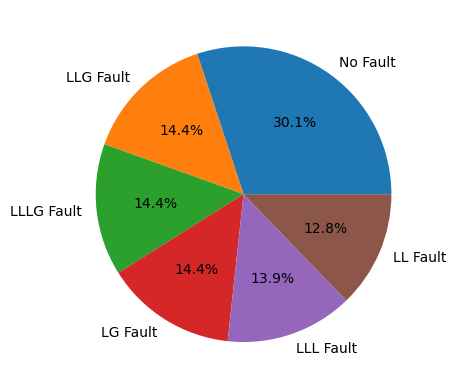

In [4]:
plt.pie(poly_features_df['faultType'].value_counts(), autopct='%1.1f%%',
       labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

In [5]:
poly_features_df['ZeroSeqCurrent'] = (poly_features_df['Ia'] + poly_features_df['Ib'] + poly_features_df['Ic']) / 3
poly_features_df['ZeroSeqVoltage'] = (poly_features_df['Va'] + poly_features_df['Vb'] + poly_features_df['Vc']) / 3

# Phase Angle Differences (approximated by product of current and voltage)
poly_features_df['PhaseAngleDiffI'] = poly_features_df['Ia'] * poly_features_df['Ib'] * poly_features_df['Ic']
poly_features_df['PhaseAngleDiffV'] = poly_features_df['Va'] * poly_features_df['Vb'] * poly_features_df['Vc']

# Voltage and Current Ratios
poly_features_df['V_I_Ratio_A'] = poly_features_df['Va'] / poly_features_df['Ia']
poly_features_df['V_I_Ratio_B'] = poly_features_df['Vb'] / poly_features_df['Ib']
poly_features_df['V_I_Ratio_C'] = poly_features_df['Vc'] / poly_features_df['Ic']

In [6]:
poly_features_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType,ZeroSeqCurrent,ZeroSeqVoltage,PhaseAngleDiffI,PhaseAngleDiffV,V_I_Ratio_A,V_I_Ratio_B,V_I_Ratio_C
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001,-25.056367,3.333333e-10,1.256217e+05,0.014267,-0.002649,0.013737,-0.003121
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001,-131.380183,-3.333333e-10,4.700515e+05,0.007311,-0.000930,0.001621,-0.010317
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001,-252.821423,9.251859e-18,-7.107534e+06,0.004599,-0.000528,0.000654,0.001871
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001,-312.179063,0.000000e+00,-1.614892e+07,0.003227,-0.000397,0.000482,0.001045
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001,-333.368620,0.000000e+00,-1.908620e+07,0.002282,-0.000326,0.000426,0.000862


In [7]:
X=poly_features_df.drop(['G','C','B','A','faultType'],axis=1)
y=poly_features_df['faultType']

In [8]:
X

,Ia,Ib,Ic,Va,Vb,Vc,ZeroSeqCurrent,ZeroSeqVoltage,PhaseAngleDiffI,PhaseAngleDiffV,V_I_Ratio_A,V_I_Ratio_B,V_I_Ratio_C
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,-25.056367,3.333333e-10,1.256217e+05,0.014267,-0.002649,0.013737,-0.003121
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,-131.380183,-3.333333e-10,4.700515e+05,0.007311,-0.000930,0.001621,-0.010317
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,-252.821423,9.251859e-18,-7.107534e+06,0.004599,-0.000528,0.000654,0.001871
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,-312.179063,0.000000e+00,-1.614892e+07,0.003227,-0.000397,0.000482,0.001045
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,-333.368620,0.000000e+00,-1.908620e+07,0.002282,-0.000326,0.000426,0.000862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,-0.956213,0.000000e+00,-6.345931e+04,-0.023851,-0.001425,-0.014354,0.018368
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,-0.956121,0.000000e+00,-6.294924e+04,-0.026008,-0.001576,-0.014819,0.017691
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,-0.956030,3.333333e-10,-6.231571e+04,-0.028103,-0.001728,-0.015305,0.017050
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,-0.955938,0.000000e+00,-6.156333e+04,-0.030129,-0.001882,-0.015816,0.016440


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# def plot_tsne(X, y):
#     # Apply t-SNE to reduce dimensionality
#     tsne = TSNE(n_components=2, random_state=42)
#     X_tsne = tsne.fit_transform(X)

#     # Plot t-SNE embeddings
#     plt.figure(figsize=(8, 6))
#     for label in np.unique(y):
#         plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=f"Class {label}", alpha=0.7)
#     plt.title('t-SNE Visualization')
#     plt.xlabel('t-SNE Component 1')
#     plt.ylabel('t-SNE Component 2')
#     plt.legend()
#     plt.show()
# plot_tsne(X, y)


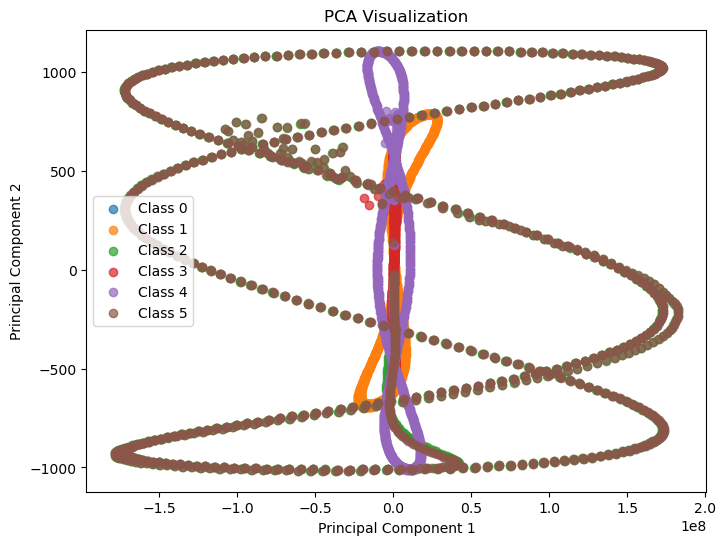

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_pca(X, y):
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plot PCA components
    plt.figure(figsize=(8, 6))
    for label in np.unique(y):
        plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f"Class {label}", alpha=0.7)
    plt.title('PCA Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()
plot_pca(X, y)


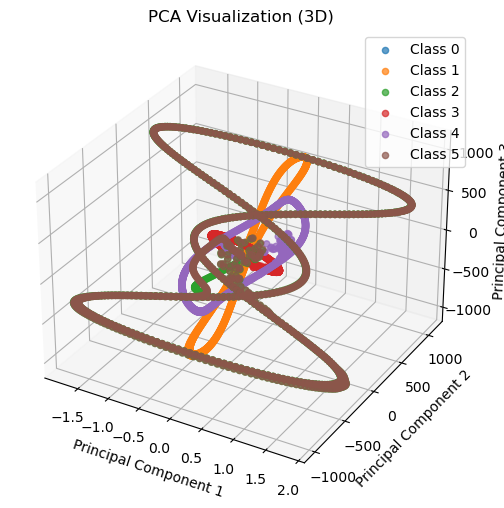

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def plot_pca_3d(X, y):
    # Apply PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Plot PCA components
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    for label in np.unique(y):
        ax.scatter(X_pca[y == label, 0], X_pca[y == label, 1], X_pca[y == label, 2], label=f"Class {label}", alpha=0.7)
    ax.set_title('PCA Visualization (3D)')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.legend()
    plt.show()


plot_pca_3d(X, y)


In [13]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.manifold import TSNE

# def plot_tsne_3d(X, y):
#     # Apply t-SNE
#     tsne = TSNE(n_components=3, random_state=42)
#     X_tsne = tsne.fit_transform(X)

#     # Plot t-SNE embeddings
#     fig = plt.figure(figsize=(8, 6))
#     ax = fig.add_subplot(111, projection='3d')
#     for label in np.unique(y):
#         ax.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], X_tsne[y == label, 2], label=f"Class {label}", alpha=0.7)
#     ax.set_title('t-SNE Visualization (3D)')
#     ax.set_xlabel('t-SNE Component 1')
#     ax.set_ylabel('t-SNE Component 2')
#     ax.set_zlabel('t-SNE Component 3')
#     plt.legend()
#     plt.show()
# plot_tsne_3d(X, y)


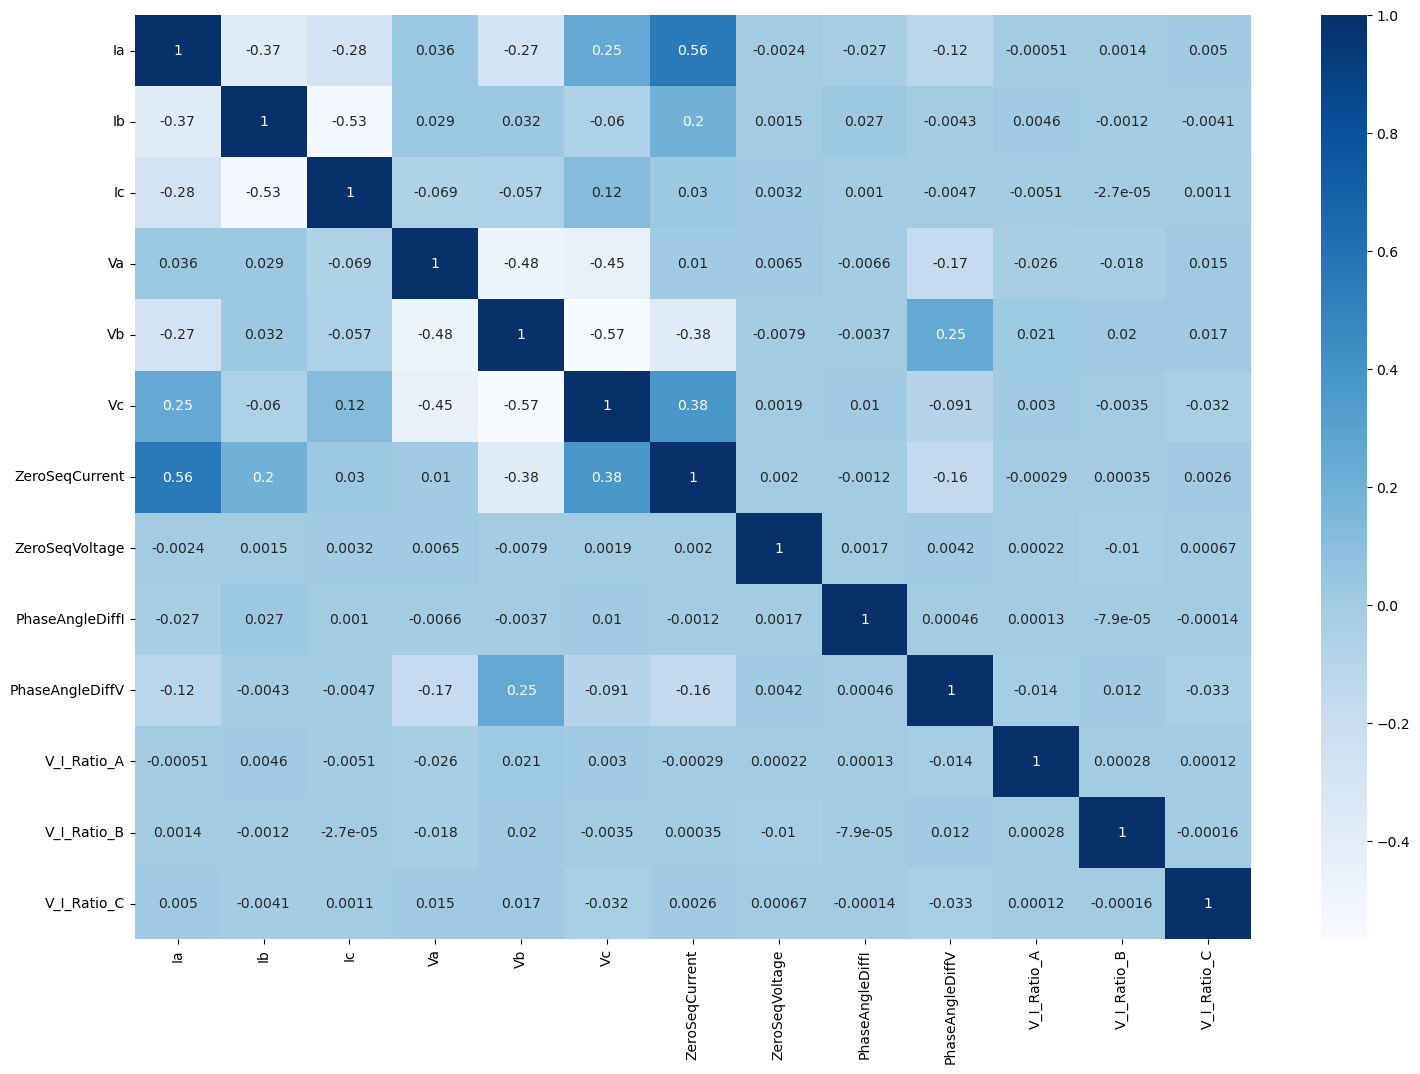

In [14]:
plt.figure(figsize=(18,12))
sns.heatmap(X.corr(), annot=True, cmap='Blues')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 13), (1573, 13), (6288,), (1573,))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [18]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize dictionaries to store cross-validation and test metrics
cv_metrics = {'Model': [], 'Accuracy': []}
test_metrics = {'Model': [], 'Accuracy': []}

# Define a function to train and evaluate the model
def train_and_evaluate_model(model, model_name, X_train, y_train):
    # Define the scoring metrics for multi-class classification
    scoring = {'accuracy': make_scorer(accuracy_score)}

    # Perform cross-validation using StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring)
    
    # Store the cross-validation metrics
    cv_metrics['Model'].append(model_name)
    cv_metrics['Accuracy'].append(scores['test_accuracy'].mean())
    print(f"{model_name}: Cross-validation metrics calculated")
    
    # Fit the model on the entire training set
    model.fit(X_train, y_train)
    return model

# Define a function to evaluate the model on the test set and store the metrics
def evaluate_on_test_set(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    test_metrics['Model'].append(model_name)
    test_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    print(f"{model_name}: Test metrics calculated")

# Provide the training and testing datasets (X_train, y_train, X_test, y_test)

# Train and test each model
models = [
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (DecisionTreeClassifier(random_state=42), "Decision Trees"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (XGBClassifier(random_state=42), "XGBoost")
]

for model, model_name in models:
    fitted_model = train_and_evaluate_model(model, model_name, X_train, y_train)
    evaluate_on_test_set(fitted_model, model_name, X_test, y_test)



K-Nearest Neighbors: Cross-validation metrics calculated
K-Nearest Neighbors: Test metrics calculated
Decision Trees: Cross-validation metrics calculated
Decision Trees: Test metrics calculated
Random Forest: Cross-validation metrics calculated
Random Forest: Test metrics calculated
XGBoost: Cross-validation metrics calculated
XGBoost: Test metrics calculated


In [19]:
# Print cross-validation metrics
print("Cross-validation metrics:")
for model, accuracy in zip(cv_metrics['Model'], cv_metrics['Accuracy']):
    print(f"{model}: {accuracy}")

# Print test metrics
print("\nTest metrics:")
for model, accuracy in zip(test_metrics['Model'], test_metrics['Accuracy']):
    print(f"{model}: {accuracy}")


Cross-validation metrics:
K-Nearest Neighbors: 0.8193392044297563
Decision Trees: 0.9952295128204156
Random Forest: 0.998091703945979
XGBoost: 0.9984097954475605

Test metrics:
K-Nearest Neighbors: 0.8200890019071837
Decision Trees: 0.9955499046408137
Random Forest: 0.9993642720915448
XGBoost: 0.9987285441830897


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
cm=confusion_matrix(y_test,y_pred)


In [21]:
accuracy_score(y_test,y_pred)

0.9993642720915448

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       220
           4       1.00      1.00      1.00       226
           5       1.00      1.00      1.00       226

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



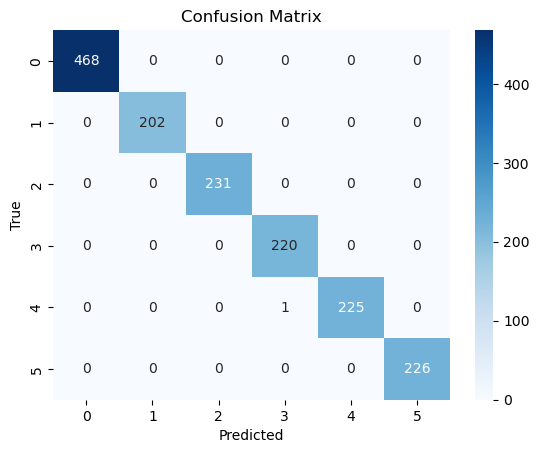

In [23]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()